In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('Zoo.csv')

In [17]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [19]:
# data has no null values
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [20]:
# Seems like we dont need animal name
# Making training and testing data without 'animal name' column
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:-1],df['type'])

In [21]:
x_train.shape,y_train.shape

((75, 16), (75,))

In [22]:
# For best values of k, we will choose values between [1,39]
# Using cross_val_score we will findout the best values k
k=[x for x in range(1,39,2)]
scores=[]
for i in k:
    scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=i),x_train,y_train,cv=5).mean())

In [24]:
print(scores)

[0.9866666666666667, 0.9333333333333333, 0.8666666666666666, 0.8133333333333332, 0.76, 0.7333333333333334, 0.72, 0.72, 0.72, 0.72, 0.6799999999999999, 0.6133333333333334, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5733333333333334, 0.5466666666666666]


In [25]:
# finding out which value gives me best result
k[np.argmax(scores)]

1

In [28]:
# Building model having k=1
model=KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

Text(50.722222222222214, 0.5, 'actual')

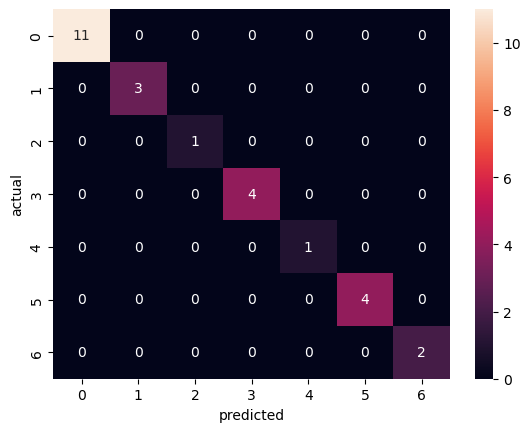

In [35]:
# Checkking confusion matrix
sn.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [36]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



Our model gives 100% accuracy

Text(50.722222222222214, 0.5, 'actual')

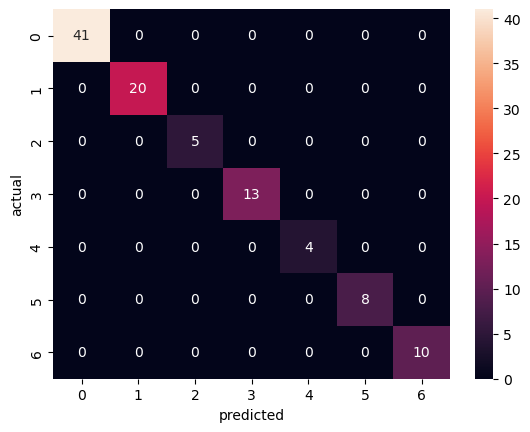

In [44]:

# For entire y lets check how our model performs
sn.heatmap(confusion_matrix(df['type'],model.predict(df.iloc[:,1:-1])),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')